# Business Problem:
- Credit card companies face significant financial losses and customer dissatisfaction due to fraudulent transactions. Since these fraudulent cases are rare and difficult to detect in real time, there is a need for a reliable and accurate system to identify suspicious transactions as early as possible.

# Project Aim:
- To develop a data-driven solution that identifies fraudulent transactions in real-time or near-real-time with minimal false positives and high detection of actual frauds.

# CONTEXT:
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have **492 frauds out of 284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, **due to confidentiality issues**, we cannot provide the original features and more background information about the data.
- **Features V1, V2, … V28 are the principal components obtained with PCA**, the only features which have **not been transformed with PCA are 'Time' and 'Amount'**. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Load libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


** Load Dataset**

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Preprocessing

In [6]:
data.duplicated().any()

np.True_

In [7]:
data = data.drop_duplicates()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

**Missing Value**

In [9]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


**Checking Class Imbalance**

In [12]:
data["Class"].value_counts()

,count
Class,
0,283253
1,473


Percentage distribution of each class (fraud and non-fraud)

In [13]:
data["Class"].value_counts()/ len(data) *100

,count
Class,
0,99.83329
1,0.16671


1. Above output tells us:

- ~99.83% of transactions are non-fraudulent (Class = 0)

- ~0.17% are fraudulent (Class = 1)

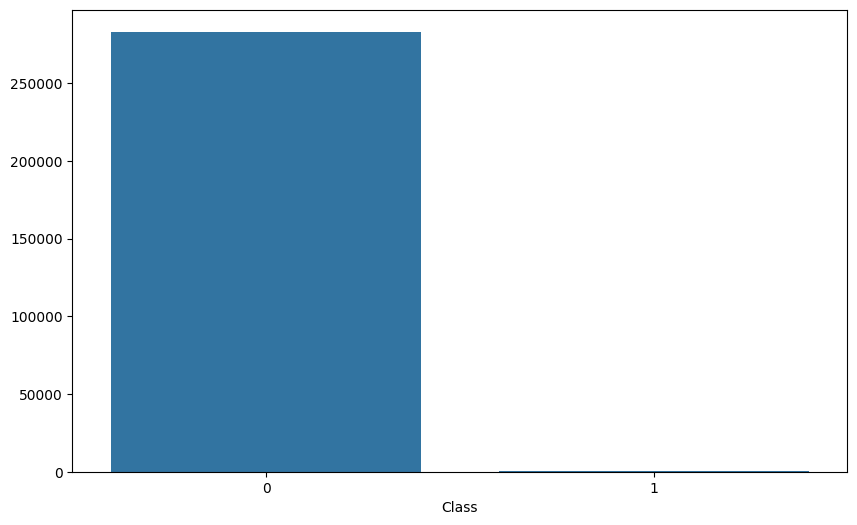

In [14]:
# plot this

plt.figure(figsize = (10,6))
sns.barplot(x=data["Class"].value_counts().index, y=data["Class"].value_counts().values)
plt.show()

**Note:**
- Notice how imbalanced the original dataset is — the vast majority of transactions are non-fraudulent.
- If we use this DataFrame as the basis for our predictive models and analysis without addressing the imbalance, we risk introducing significant errors.
- Our models may overfit by "assuming" that most transactions are not fraudulent, simply because that pattern dominates the data. However, our goal is not to let the model assume — we want it to learn and detect underlying patterns that indicate fraudulent behavior.

1. Need to handle class **imbalance** using techniques like:

- SMOTE (oversampling)

- Undersampling majority class

- Using class_weight = 'balanced' in models

# lets see other features amount and Time

In [15]:
data["Amount"].skew()

np.float64(16.978803370060476)

In [16]:
data["Time"].skew()

np.float64(-0.03558064623598194)

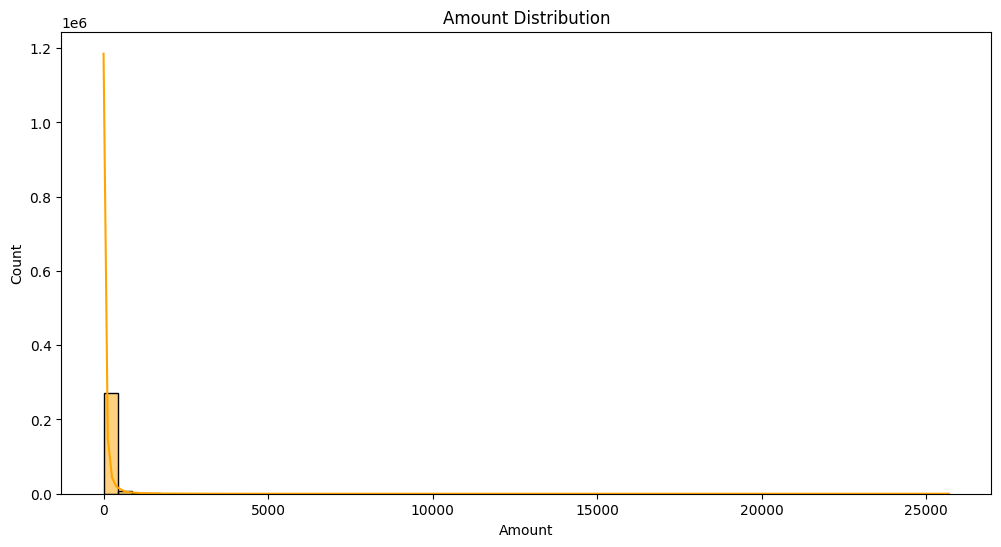

In [17]:
# Histogram Plot to Check Skewness

plt.figure(figsize=(12, 6))
sns.histplot(data['Amount'], kde=True , bins = 60, color ="orange")
plt.title('Amount Distribution')
plt.show()

Text(0.5, 1.0, 'Time Distribution')

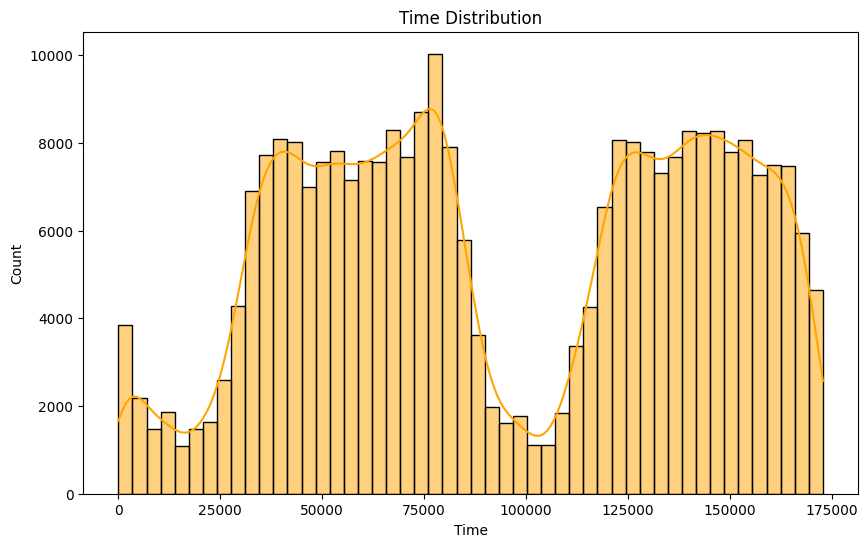

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data["Time"], bins=50, kde=True, color="orange")
plt.title("Time Distribution")

**Distribution of Time and Amount per Class (0= non-fraud, 1=fraud case)**

Text(0.5, 1.0, 'Amount Distribution per Class')

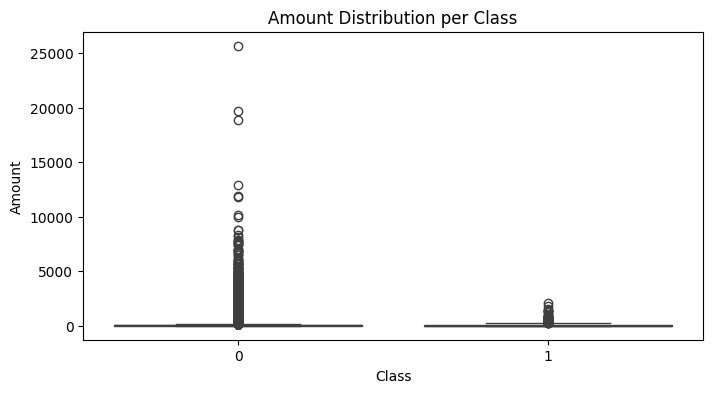

In [19]:
# Boxplot Figure 1: Amount vs Class
plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Amount", data=data)
plt.title("Amount Distribution per Class")

Text(0.5, 1.0, 'Time Distribution per Class')

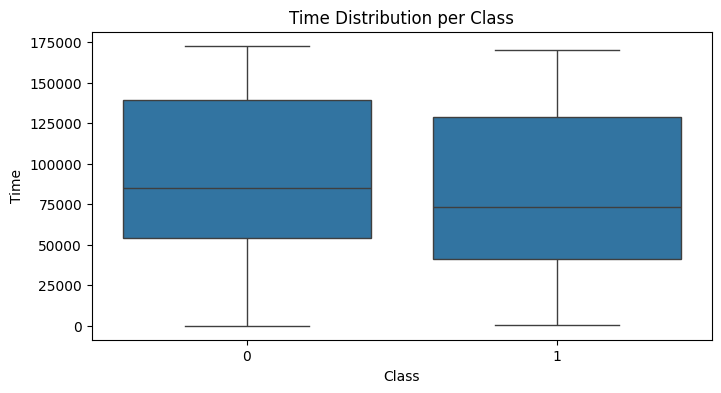

In [20]:
# Boxplot Figure 1: Time vs Class
plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Time", data=data)
plt.title("Time Distribution per Class")

In [21]:
data = data.drop(columns=['Time'])

### 🔍 **Metric Selection for Heavily Imbalanced Data**

- In cases where the dataset is **heavily imbalanced** (e.g., only **0.17%** of transactions are fraudulent), **accuracy is not a reliable evaluation metric**.

- A model that predicts only the **majority class** (e.g., all transactions as non-fraud) can still show **over 99% accuracy**, but it would be **ineffective for fraud detection**.

- Instead, focus on the **ROC-AUC score** (Receiver Operating Characteristic - Area Under the Curve), which evaluates model performance **across all classification thresholds**.

- The **ROC curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various thresholds to show how well the model distinguishes between the classes.

- The **default threshold of 0.5** is not always ideal in imbalanced scenarios. The **optimal threshold** is where **TPR is high** and **FPR is low**, minimizing misclassifications.

- After identifying the best threshold from the ROC curve, compute the **F1-score** to evaluate the balance between **precision** (how many predicted frauds are actual frauds) and **recall** (how many actual frauds are detected).



# **Undersampling**
- 🔍 What is Undersampling?
Undersampling is a technique used to handle imbalanced datasets — when one class (e.g., "No Fraud") significantly outnumbers another (e.g., "Fraud").

In [22]:
# 1. Separate the two classes
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

print("Fraud cases:", len(fraud))
print("Non-Fraud cases:", len(non_fraud))

Fraud cases: 473
Non-Fraud cases: 283253


In [23]:
# 2. Undersample the non-fraud class to match fraud count
non_fraud = non_fraud.sample(n=len(fraud), random_state=42)

In [24]:
non_fraud.shape

(473, 30)

**3. Concatenate the balanced dataset**



In [25]:
# 3. Concatenate the balanced dataset
balanced_data = pd.concat([fraud, non_fraud], axis=0)

In [26]:
balanced_data.shape

(946, 30)

In [27]:
balanced_data["Class"].value_counts()

,count
Class,
1,473
0,473


**Shuffle the data (original indices are preserved here)**


In [28]:
balanced_data = balanced_data.sample(frac=1, random_state=42)

In [29]:
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154697,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59,1
8842,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,-4.594952,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.00,1
91708,1.122871,0.343285,0.999876,2.834753,-0.583734,-0.353148,-0.088809,0.004844,-0.115846,0.535837,...,-0.062839,-0.035147,-0.035944,0.706702,0.556417,0.059330,0.003619,0.023087,9.82,0
233258,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,-1.445375,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27,1
17317,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1


In [30]:
balanced_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41395,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
144108,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,-5.822449,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
36725,-0.920723,-0.558611,2.102172,-2.454817,-0.780744,-1.106407,-0.097160,-0.246443,-1.945698,1.211963,...,-0.536604,-0.997543,0.229041,0.253062,0.196869,-0.567556,0.039530,-0.134685,5.76,0
249239,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,...,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99,1
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1


In [31]:
balanced_data.shape

(946, 30)

**Reset the Index**

In [32]:
balanced_data = balanced_data.reset_index(drop=True)

In [33]:
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59,1
1,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,-4.594952,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.00,1
2,1.122871,0.343285,0.999876,2.834753,-0.583734,-0.353148,-0.088809,0.004844,-0.115846,0.535837,...,-0.062839,-0.035147,-0.035944,0.706702,0.556417,0.059330,0.003619,0.023087,9.82,0
3,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,-1.445375,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27,1
4,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1


In [34]:
balanced_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
941,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
942,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,-5.822449,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
943,-0.920723,-0.558611,2.102172,-2.454817,-0.780744,-1.106407,-0.097160,-0.246443,-1.945698,1.211963,...,-0.536604,-0.997543,0.229041,0.253062,0.196869,-0.567556,0.039530,-0.134685,5.76,0
944,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,...,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99,1
945,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1


# Checking class for new balanced data

In [35]:
balanced_data['Class'].value_counts()


,count
Class,
1,473
0,473


# Disadvantages of Undersampling
1. Loss of 282,780 Legitimate Transactions:
- Only 473 out of 283,253 non-fraud cases were kept.
- 99.83% of legitimate data was discarded.

2. Drastic Reduction in Dataset Size:
- From 283,726 records to just 946 records — that’s a 99.66% reduction.

3. High Risk of Underfitting:
- The model now has very few examples to learn from, which can hurt its ability to recognize diverse patterns.

# splitting data

In [36]:
X = balanced_data.drop("Class" , axis =1)
y = balanced_data["Class"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])
X_test[['Amount']] = scaler.transform(X_test[['Amount']])

# Logistic Regression with Hyperparameter Tuning + Final Model

In [39]:
#  Imports and Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hyperparameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Grid Search
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='roc_auc', cv=5, return_train_score=True)
grid.fit(X_train, y_train)

# Best Model
best_logreg = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


**Model Prediction**

In [40]:
# Model Prediction using Best Logistic Regression
y_pred = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)[:, 1]


**Evaluation and ROC Curve**


 Evaluation Metrics for Best Logistic Regression Model:
Confusion Matrix:
 [[83  2]
 [14 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91        85
           1       0.98      0.87      0.92       105

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

F1 Score: 0.9192
ROC AUC Score: 0.9771


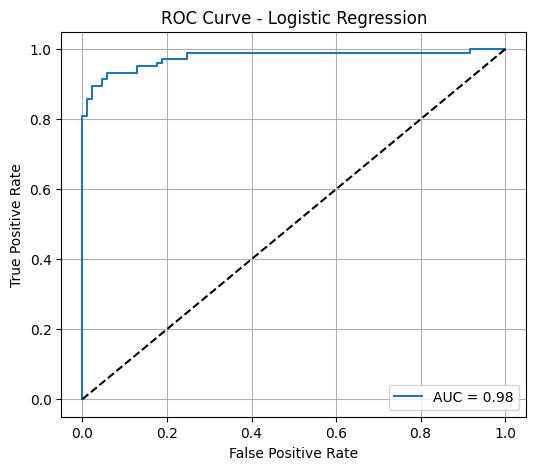

In [41]:
# Evaluation Metrics
print("\n Evaluation Metrics for Best Logistic Regression Model:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from sklearn.metrics import precision_score, recall_score

logreg_results = {
    'Model': 'Logistic Regression',
    'Precision': round(precision_score(y_test, y_pred), 4),
    'Recall': round(recall_score(y_test, y_pred), 4),
    'F1 Score': round(f1_score(y_test, y_pred), 4),
    'ROC AUC': round(roc_auc_score(y_test, y_proba), 4)
}



# Decision Tree with Hyperparameter Tuning + Final Model

In [43]:
# Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Define parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [5, 10, 12 , 15, 20],
    'criterion': ['gini', 'entropy']
}

# Step 2: GridSearchCV for hyperparameter tuning
dtree = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dtree, param_grid, scoring='roc_auc', cv=5, return_train_score=True)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [5, 10, 12, 15, 20]},
             return_train_score=True, scoring='roc_auc')

In [44]:
#  Step 3: Best parameters
print("Best Parameters for Decision Tree:", grid_dt.best_params_)

✅ Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 15}


✅ Final Decision Tree Classifier Code (with Best Params)

In [45]:
#  Final Decision Tree Model with Best Parameters
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

# Define final model with best parameters
final_dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_split=15,
    random_state=42
)

# Fit the model on training data
final_dtree.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=15,
                       random_state=42)

🔍 Confusion Matrix:
[[76  9]
 [13 92]]

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        85
           1       0.91      0.88      0.89       105

    accuracy                           0.88       190
   macro avg       0.88      0.89      0.88       190
weighted avg       0.89      0.88      0.88       190

F1 Score: 0.8932
ROC AUC Score: 0.9279


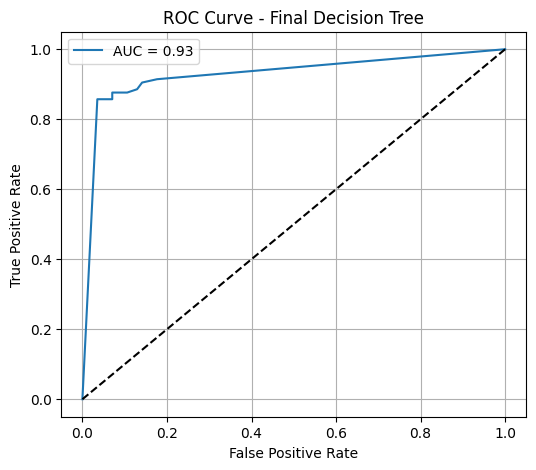

In [46]:
# Predict on test data
y_dtree_pred = final_dtree.predict(X_test)
y_dtree_proba = final_dtree.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_dtree_pred))

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_dtree_pred))

print("F1 Score:", round(f1_score(y_test, y_dtree_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_dtree_proba), 4))

# ROC Curve Plot
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dtree_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {roc_auc_score(y_test, y_dtree_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Final Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
dtree_results = {
    'Model': 'Decision Tree',
    'Precision': round(precision_score(y_test, y_dtree_pred), 4),
    'Recall': round(recall_score(y_test, y_dtree_pred), 4),
    'F1 Score': round(f1_score(y_test, y_dtree_pred), 4),
    'ROC AUC': round(roc_auc_score(y_test, y_dtree_proba), 4)
}


# Random Forest with Hyperparameter Tuning + Final Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

# 1️. Define parameter grid
param_grid_rf = {
    'n_estimators': [300, 400,500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# 2️. Initialize and apply GridSearchCV
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

# 3️. Best parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400}


🔍 Confusion Matrix:
[[82  3]
 [12 93]]

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        85
           1       0.97      0.89      0.93       105

    accuracy                           0.92       190
   macro avg       0.92      0.93      0.92       190
weighted avg       0.93      0.92      0.92       190

F1 Score: 0.9254
ROC AUC Score: 0.9697


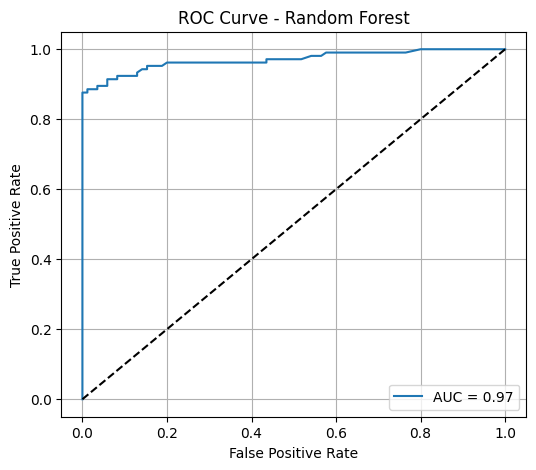

In [50]:
# 4️. Final Model with Best Parameters (use your actual output here)
final_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    criterion='entropy',
    random_state=42
)

# 5️. Train on full training set
final_rf.fit(X_train, y_train)

# 6️. Predict and evaluate
y_rf_pred = final_rf.predict(X_test)
y_rf_proba = final_rf.predict_proba(X_test)[:, 1]

# 7️. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rf_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_rf_pred))

print("F1 Score:", round(f1_score(y_test, y_rf_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_rf_proba), 4))

# 8️. Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_score(y_test, y_rf_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
rf_results = {
    'Model': 'Random Forest',
    'Precision': round(precision_score(y_test, y_rf_pred), 4),
    'Recall': round(recall_score(y_test, y_rf_pred), 4),
    'F1 Score': round(f1_score(y_test, y_rf_pred), 4),
    'ROC AUC': round(roc_auc_score(y_test, y_rf_proba), 4)
}


 # XGBoost with Hyperparameter Tuning + Final Model

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve


In [53]:
# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize and apply GridSearchCV
grid_xgb = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_xgb.fit(X_train, y_train)

# Best parameters
print("Best Parameters for XGBoost:", grid_xgb.best_params_)




Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best Parameters for XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}


🔍 Confusion Matrix:
[[81  4]
 [11 94]]

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        85
           1       0.96      0.90      0.93       105

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

F1 Score: 0.9261
ROC AUC Score: 0.9709


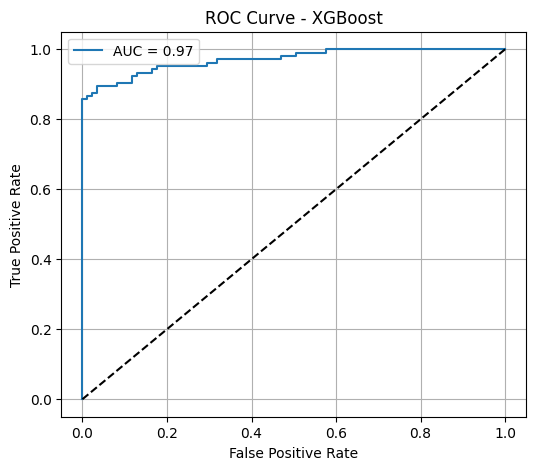

In [54]:
# Example (replace with your actual best parameters)
final_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=1,
    eval_metric='logloss',
    random_state=42
)

# Train the model
final_xgb.fit(X_train, y_train)

# Predictions
y_xgb_pred = final_xgb.predict(X_test)
y_xgb_proba = final_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_xgb_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_xgb_pred))

print("F1 Score:", round(f1_score(y_test, y_xgb_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_xgb_proba), 4))

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_xgb_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_score(y_test, y_xgb_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
xgb_results = {
    'Model': 'XGBoost',
    'Precision': round(precision_score(y_test, y_xgb_pred), 4),
    'Recall': round(recall_score(y_test, y_xgb_pred), 4),
    'F1 Score': round(f1_score(y_test, y_xgb_pred), 4),
    'ROC AUC': round(roc_auc_score(y_test, y_xgb_proba), 4)}


###🧪 Model Evaluation & Comparison

In [56]:
import pandas as pd

# Combine results
results_df = pd.DataFrame([
    logreg_results,
    dtree_results,
    rf_results,
    xgb_results
])

# Sort by F1 Score (optional)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Show results
print(results_df)


                 Model  Precision  Recall  F1 Score  ROC AUC
0              XGBoost     0.9592  0.8952    0.9261   0.9709
1        Random Forest     0.9688  0.8857    0.9254   0.9697
2  Logistic Regression     0.9785  0.8667    0.9192   0.9771
3        Decision Tree     0.9109  0.8762    0.8932   0.9279


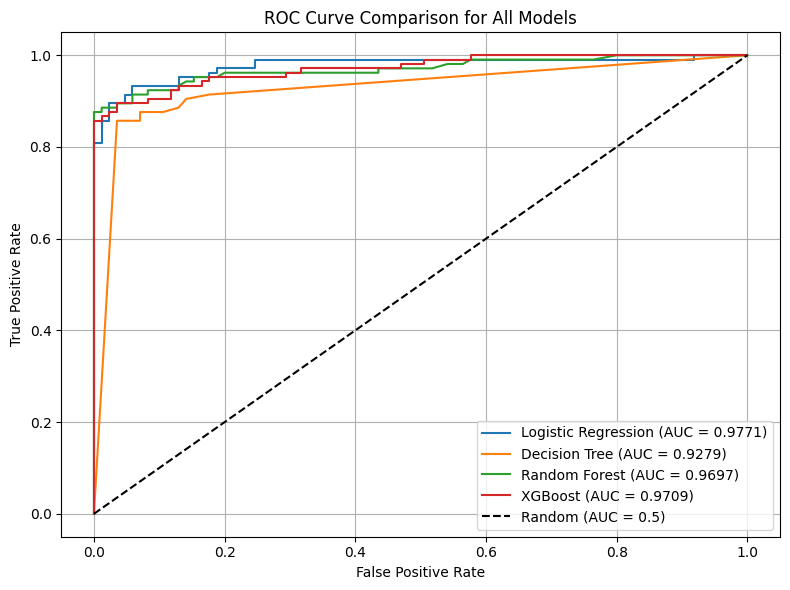

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot all ROC curves
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.4f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dtree_proba)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_dtree_proba):.4f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_rf_proba):.4f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_xgb_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_xgb_proba):.4f})')

# Plot Settings
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.title('ROC Curve Comparison for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


###✅  ROC Curve Comparison Plot
**The ROC (Receiver Operating Characteristic) curve compares the True Positive Rate (Recall) against the False Positive Rate for different threshold values. The AUC (Area Under Curve) tells us how well the model separates the classes (fraud vs. non-fraud in your case).**



### 📌 Interpretation:

1. **Precision** measures how many predicted frauds are actually fraud (↓ False Positives).
   - **Highest in Logistic Regression** (0.9785) → Very few false positives.
   - But too high precision with **lower recall** means **some real frauds may be missed**.

2. **Recall** measures how many actual frauds were caught (↓ False Negatives).
   - **Highest in XGBoost** (0.8952) → Catches more real frauds.
   - Very useful in fraud detection where **missing a fraud (False Negative)** is costly.

3. **F1 Score** balances Precision and Recall.
   - **XGBoost has the best F1 Score (0.9261)**, followed closely by Random Forest.
   - Indicates the best trade-off between catching frauds and minimizing false alarms.

4. **ROC AUC Score** shows overall classification power (threshold-independent).
   - **Highest in Logistic Regression (0.9771)**, but not enough to offset lower recall.
   - **XGBoost (0.9709)** is very close and more balanced.


## 🏦 Summary for Business Stakeholders:

### ➤ **For Banks with Small Average Transaction Values**:
- **High Precision** is crucial.
- False positives (flagging non-fraudulent transactions) can be managed by involving a **human verifier** (e.g., call the customer).
- However, too many false positives (low precision) increase **operational costs** and may cause **customer dissatisfaction**.

### ➤ **For Banks with High-Value Transactions**:
- **High Recall** becomes more important.
- False negatives (missed frauds) can lead to **significant financial losses**.
- Thus, catching as many actual frauds as possible is a priority, even if it means tolerating a few false positives.


### 🏁 Conclusion:
- ✅ **XGBoost is the best overall model** for this fraud detection task.
- It offers **high recall**, meaning fewer frauds are missed, and still maintains **strong precision**, reducing false alarms.
- While Logistic Regression is very precise, its **lower recall suggests it may miss more fraud cases**.